In [1]:
# Imports

import numpy as np
import scipy
import matplotlib.pyplot as plt
import utils

# %matplotlib tk
%matplotlib inline

In [2]:
# Top hat + triangle with padding

sampling_freq : int = 1
sound1 : np.ndarray = np.concat(([0]*100, [1]*100, [0]*100)) # top hat
sound2 : np.ndarray = np.concat(([0]*100, np.arange(1, 101)/100, [0]*100)) # triangle

In [3]:
# Top hat + triangle withOUT padding

sampling_freq : int = 1
sound1 : np.ndarray = np.ones(100) # top hat
sound2 : np.ndarray = np.arange(1, 101)/100 # triangle

In [4]:
# Load audio files

sampling_freq, sound1 = scipy.io.wavfile.read("audio/Piano C2.wav")
sampling_freq, sound2 = scipy.io.wavfile.read("audio/Piano C2 - 2.wav")
# Normalise sound volume
sound1 : float = sound1 / (2.**15)
sound2 : float = sound2 / (2.**15)

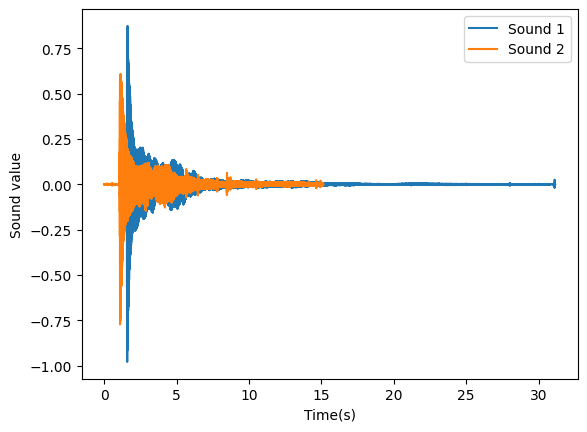

In [5]:
# Plot sounds

utils.plot_sounds(sound1, sound2, sampling_freq=sampling_freq)

In [6]:
# Compute cross correlation

# Zero pad the audio
shift : int = 0
sound1_padded = np.pad(sound1, pad_width=(0, sound2.shape[0] - 1))
sound2_padded = np.pad(sound2, pad_width=(shift, sound1.shape[0] - 1 - shift))

# Take FFTs
fft1 = scipy.fft.rfft(sound1_padded)
fft2 = scipy.fft.rfft(sound2_padded)

# Multiply together in frequency domain
fft_product = np.multiply(fft1, np.conjugate(fft2))

# Take IFFT
cross_correlation = scipy.fft.irfft(fft_product)

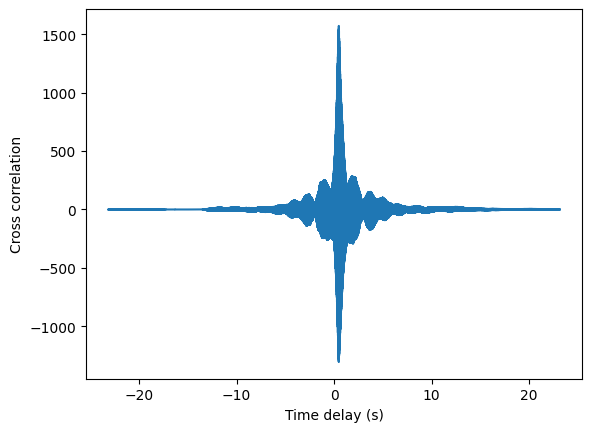

In [7]:
# Plot cross correlation

time_window = cross_correlation.shape[0] / sampling_freq

cross_correlation_shifted : np.ndarray = np.concat((cross_correlation[cross_correlation.shape[0]//2:], cross_correlation[:cross_correlation.shape[0]//2]))

plt.figure()
plt.plot(np.arange(-time_window/2, time_window/2, 1/sampling_freq), cross_correlation_shifted)
plt.xlabel("Time delay (s)")
plt.ylabel("Cross correlation")
plt.show()

In [8]:
# Get max point

peak : int = np.argmax(cross_correlation)
peak = peak if peak < cross_correlation.shape[0] / 2 else peak - cross_correlation.shape[0]

delay: float = - peak / sampling_freq

print(f"Audio delay: {delay}s")

Audio delay: -0.49201814058956916s


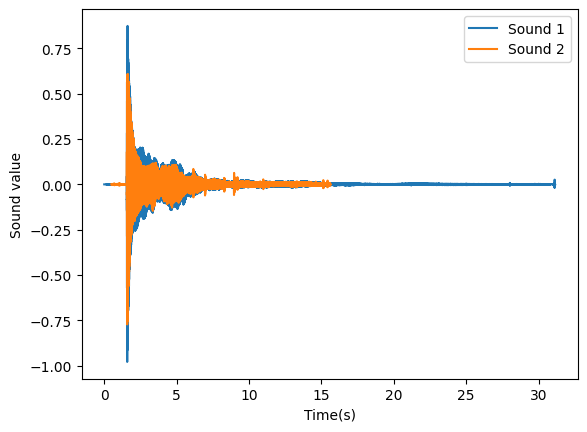

In [9]:
# Plot shifted sounds

utils.plot_sounds(sound1, sound2, sampling_freq=sampling_freq, delay=-delay)